In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import pickle
import json
import os
import json
import pandas as pd
import ipdb

import sys
import torch
import matplotlib; matplotlib #.use('agg')
import matplotlib.pyplot as plt
import ipdb
import numpy as np
import os

['original_all_ans_same_counting_train2014.json', 'counting_val2014_10_10.json', 'counting_val2014_10.json']
['edited_all_ans_same_counting_train2014.json']


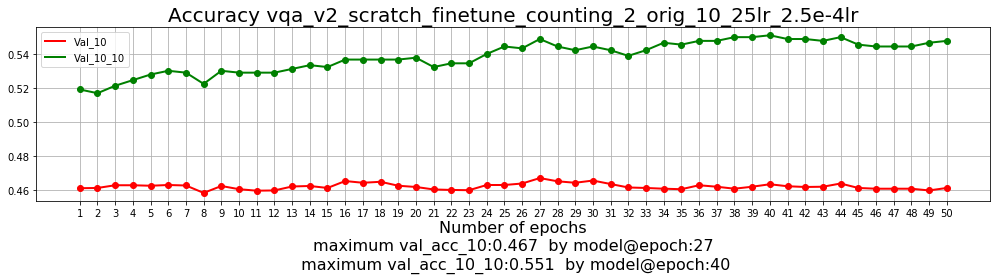

['orig_10_del1_counting_train2014.json', 'counting_val2014_10.json', 'counting_val2014_10_10.json']


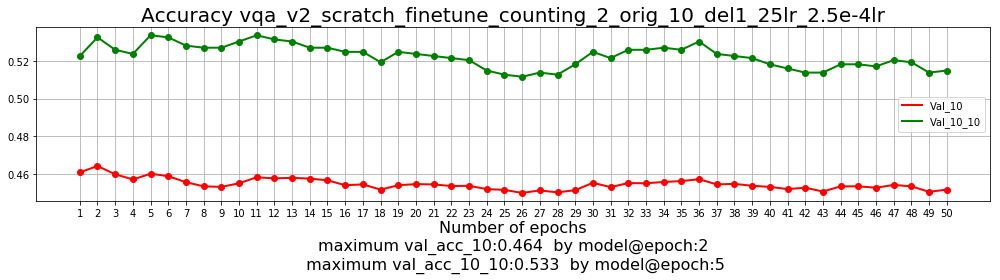

['counting_val2014_10.json', 'counting_val2014_10_10.json', 'orig_10_del1_edited_10_counting_train2014.json']


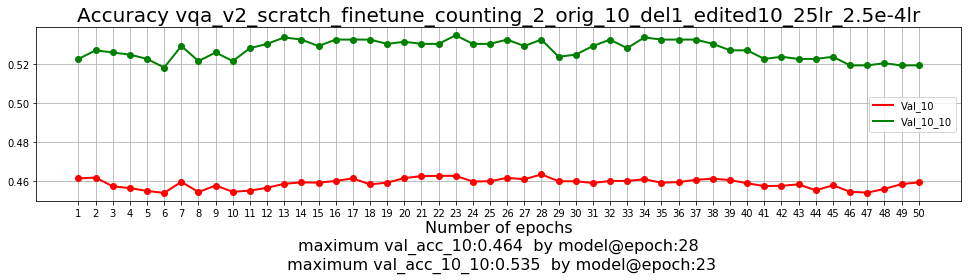

['counting_val2014_10_10.json', 'original_all_ans_same_counting_train2014.json', 'edited_all_ans_same_counting_train2014.json', 'counting_val2014_10.json', 'orig_10_edited_10_counting_train2014.json']


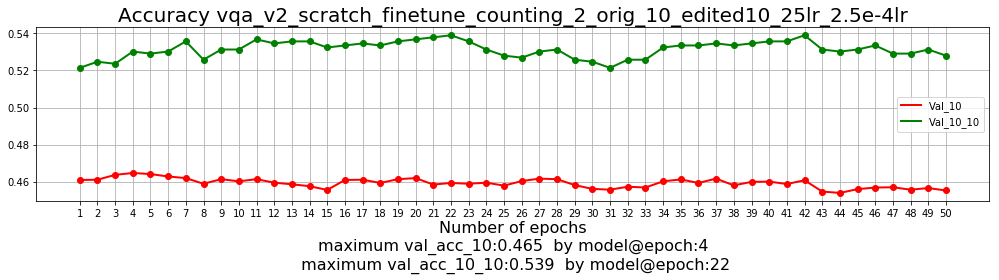

['original_everyIQA_counting_train2014.json', 'counting_val2014_10_10.json', 'original_all_ans_same_counting_train2014.json', 'edited_all_ans_same_counting_train2014.json', 'counting_val2014_10.json']


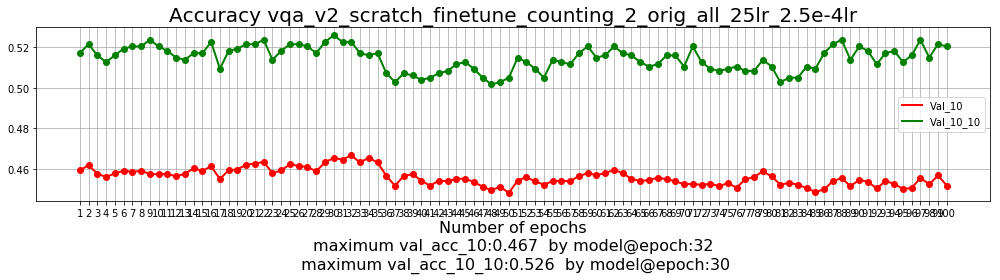

['counting_val2014_10_10.json', 'counting_val2014_10.json', 'orig_all_del1_counting_train2014.json']


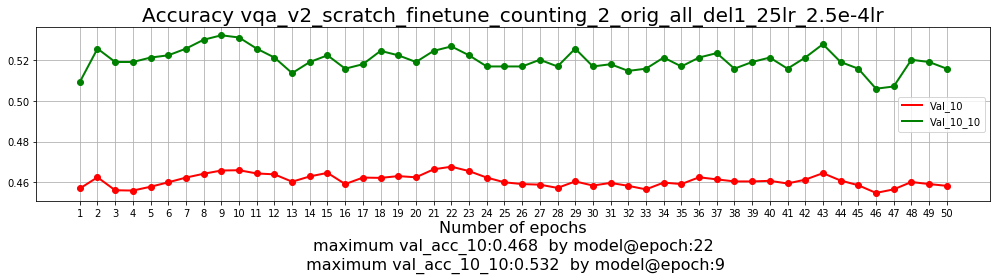

['orig_all_del1_edited_10_counting_train2014.json', 'counting_val2014_10.json', 'counting_val2014_10_10.json']


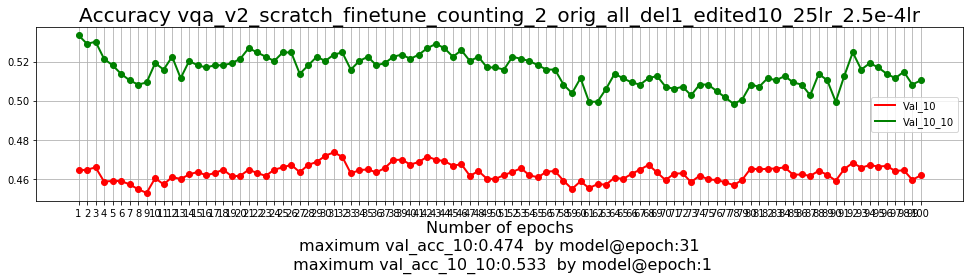

['counting_val2014_10_10.json', 'orig_all_del1_edited_all_counting_train2014.json', 'counting_val2014_10.json']


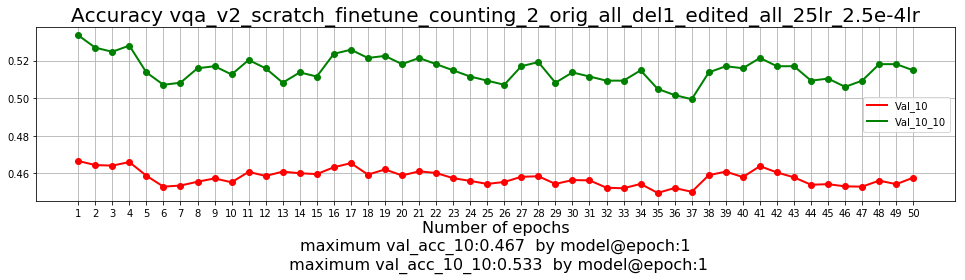

In [24]:
## selecting best vqa_scratch model baseline
#dir_list = ['vqa_v2_scratch_train_25lr']#

root_dir = '/BS/vedika2/nobackup/snmn/vedi_logs/'

ques_type_filter = ['counting']
splits = ['orig_10', 'orig_10_edited10', 'orig_all']
splits_what_color = ['orig_10', 'orig_10_edited10', 'orig_all', 'orig_all_edited10']
splits_counting = ['orig_10', 'orig_10_del1', 'orig_10_del1_edited10', 'orig_10_edited10' , 'orig_all', 'orig_all_del1', 'orig_all_del1_edited10', 'orig_all_del1_edited_all']

for ques_type in ques_type_filter:
    if ques_type== 'what_color_is_the':
        splits = splits_what_color
    elif ques_type== 'counting':
        splits = splits_counting        
    for split in splits:
        a_dir = 'vqa_v2_scratch_finetune_' + ques_type +  '_' + split + '_25lr'
        if ques_type== 'counting':
            a_dir = 'vqa_v2_scratch_finetune_' + ques_type +  '_2_' + split + '_25lr'
        for (dirpath, dirnames, filenames) in os.walk(os.path.join(root_dir, a_dir)):
            print(filenames)
            for file in filenames:  
                if ques_type + '_val2014_10.json' in file:
                    val_file_name_10 = file
                if  ques_type + '_val2014_10_10.json' in file:
                    val_file_name_10_10 = file

    #     trn_pkl_file = os.path.join(root_dir, a_dir, train_file_name)
        val_pkl_file_10 = os.path.join(root_dir, a_dir, val_file_name_10)
        val_pkl_file_10_10 = os.path.join(root_dir, a_dir, val_file_name_10_10)
    #     with open(trn_pkl_file, 'r') as f:
    #         train_data = json.load(f)    
        with open(val_pkl_file_10, 'r') as f:
            val_data_10 = json.load(f)
        with open(val_pkl_file_10_10, 'r') as f:
            val_data_10_10 = json.load(f)
        #assert val_data['learning rate'] == train_data['learning rate']
        dir_string = a_dir + '_' +  '2.5e-4lr'#str(train_data['learning rate'])


        fig, ax = plt.subplots(figsize=(14,4))
        x2 = [str(i+1) for i in range(len(val_data_10['epoch_accuracy']))]
        max_val_acc = round(np.max(list(val_data_10['epoch_accuracy'].values())),3)
        epoch_max_val_acc = x2[np.argmax(list(val_data_10['epoch_accuracy'].values()))]

        max_val_acc_10_10 = round(np.max(list(val_data_10_10['epoch_accuracy'].values())),3)
        epoch_max_val_acc_10_10 = x2[np.argmax(list(val_data_10_10['epoch_accuracy'].values()))]


        ax.plot(x2, list(val_data_10['epoch_accuracy'].values()), 'r', linewidth=2, label='Val_10')
        ax.plot(x2, list(val_data_10['epoch_accuracy'].values()), 'r.', markersize=12)

        ax.plot(x2, list(val_data_10_10['epoch_accuracy'].values()), 'g', linewidth=2, label='Val_10_10')
        ax.plot(x2, list(val_data_10_10['epoch_accuracy'].values()), 'g.', markersize=12)


        str_put = 'maximum val_acc_10:' + str(max_val_acc) + '  by model@epoch:' + str(epoch_max_val_acc) + \
        '\n maximum val_acc_10_10:' + str(max_val_acc_10_10) + '  by model@epoch:' + str(epoch_max_val_acc_10_10)


        ax.set_xlabel('Number of epochs' +  '\n' + str_put, fontsize=16)
        ax.set_title('Accuracy' + ' ' + dir_string , fontsize=20)
        #ax.set_yticks(range(0,1,100), range(0,1,100))

        #ax.grid(which='both', alpha=0.5)
        ax.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


In [ ]:
 list(val_data_10['epoch_accuracy'].values())[13]

In [ ]:
 list(val_data_10['epoch_accuracy'].values())[3]

In [ ]:
x = [str(int(float(i))) for i in list(train_data['epoch_accuracy'].keys())]
x2  = x
max_val_acc = round(np.max(list(val_data['epoch_accuracy'].values())),3)
epoch_max_val_acc = x2[np.argmax(list(val_data['epoch_accuracy'].values()))]
print('maximum val_acc:', max_val_acc, 'epoch:', epoch_max_val_acc)
str_put = 'maximum val_acc:' + str(max_val_acc) + '  by model@epoch:' + str(epoch_max_val_acc)

fig, ax = plt.subplots(figsize=(14,4))

ax.plot(x, list(train_data['epoch_accuracy'].values()), 'b' , linewidth=3, label='Train')
ax.plot(x, list(train_data['epoch_accuracy'].values()), 'b.', markersize=12)

ax.plot(x2, list(val_data['epoch_accuracy'].values()), 'g', linewidth=3, label='Val')
ax.plot(x2, list(val_data['epoch_accuracy'].values()), 'g.', markersize=12)

ax.set_xlabel('Number of epochs' +  '                  ' + str_put, fontsize=16)
ax.set_title('Accuracy' + ' ' + dir_string , fontsize=20)
ax.set_xticks(range(len(train_data['epoch_accuracy'])), train_data['epoch_accuracy'].values())
#ax.set_yticks(range(0,1,100), range(0,1,100))

#ax.grid(which='both', alpha=0.5)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(14,3))
#x2 = [str(i+1) for i in range(50)]
max_val_acc = round(np.max(list(val_data['epoch_accuracy'].values())),3)
epoch_max_val_acc = x2[np.argmax(list(val_data['epoch_accuracy'].values()))]
ax.plot(x2, list(val_data['epoch_accuracy'].values()), 'g', linewidth=3, label='Val')
ax.plot(x2, list(val_data['epoch_accuracy'].values()), 'g.', markersize=12)

ax.set_xlabel('Number of epochs' +  '                  ' + str_put, fontsize=16)
ax.set_title('Accuracy' + ' ' + dir_string , fontsize=20)
ax.set_xticks(range(len(train_data['epoch_accuracy'])), train_data['epoch_accuracy'].values())
#ax.set_yticks(range(0,1,100), range(0,1,100))

#ax.grid(which='both', alpha=0.5)
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
x_K = [0.03, 0.06, 0.125, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5, 6 , 7, 8 , 9 , 18]
x = [30,60,125,250,500,1000,1500,2000,2500,3000,3500,4000,5000,6000,7000,8000,9000,18000]
y = [0.2743, 0.295, 0.3384, 0.3844, 0.4873, 0.683, 0.7722, 0.8159, 0.8448, 0.8717, 0.8813, 0.8899, 0.9171,
    0.9297,0.931, 0.94, 0.9411, 0.9537]

y_joint1 = [0.4771,0.4768, 0.4854, 0.496, 0.5168, 0.7527, 0.7562,0.7885, 0.8325, 0.8268, 0.8567, 0.848, 0.8768, 
          0.8913,0.905, 0.9273, 0.9555, 0.962]
x_joint1 = [0.03, 0.06, 0.125, 0.25, 0.5, 1, 1.5,2, 2.5, 3, 3.5, 4, 5, 6 ,7, 8 , 9 , 18]
x_joint1 = x

fig, ax = plt.subplots()
ax.plot(x,y, 'g', linewidth=3, linestyle = '--', label='No FT')
ax.plot(x, y, 'g.', markersize=12)
ax.plot(x_joint1,y_joint1, 'b',linewidth=3, label='With FT')
ax.plot(x_joint1,y_joint1, 'b.', markersize=12)
ax.set_xlabel('Number of training programs',fontsize=16)
ax.set_title('Answer Accuracy', fontsize=20)
ax.tick_params(direction='out', length=6, width=2, 
               grid_color='bl', grid_alpha=0.5)
plt.xscale('log')
ax.legend()
plt.show()

In [ ]:
trn_acc_3

In [7]:
exps = os.listdir('/BS/vedika3/nobackup/pytorch-vqa/models/')

In [18]:
exps = [i for i in exps if 'SAAA' not in i]
exps = [i for i in exps if 'pth' not in i ]

In [19]:
exps

['finetuning_CNN_LSTM_ratio_mix_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_1',
 'finetuning_CNN_LSTM_data_aug2_get_edits_origamt_0.66',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_10_KL_0_MSE_0',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM',
 'finetuning_CNN_LSTM_ratio_mix_load_only_orig_ids_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0.3_MSE_1',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0_KL_0.3_MSE_0',
 'data_aug_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_0',
 'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.7:0.3',
 'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0_KL_0_MSE_1',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_0',
 'data_au

In [21]:
len(exps)

23

In [62]:
exps

['finetuning_CNN_LSTM_ratio_mix_orig:edit_0.3:0.7',
 'finetuning_SAAA',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_1',
 'finetuning_CNN_LSTM_data_aug2_get_edits_origamt_0.66',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'no_attn_biasTrue.pth',
 'finetuning_CNN_LSTM',
 'no_attn_biasFalse.pth',
 'finetuning_CNN_LSTM_ratio_mix_load_only_orig_ids_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0.3_MSE_1',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0_KL_0.3_MSE_0',
 'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.7:0.3',
 'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0_KL_0_MSE_1',
 'show_ask_attend_answer.pth',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_0',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_ori

In [43]:
exps2 = ['finetuning_CNN_LSTM_ratio_mix_orig:edit_0.3:0.7',
 'finetuning_SAAA',
 'finetuning_CNN_LSTM_data_aug2_get_edits_origamt_0.66',
 'no_attn_biasTrue.pth',
 'finetuning_CNN_LSTM',
 'no_attn_biasFalse.pth',
 'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.7:0.3',
 'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.5:0.5',
 'show_ask_attend_answer.pth',
 'finetuning_CNN_LSTM_data_aug2_get_all_edits_origamt_0.5',
 'finetuning_CNN_LSTM_data_aug2_get_edits_if_not_orig_origamt_0.5',
 'finetuning_CNN_LSTM_data_aug2_get_edits_origamt_0.5']

In [44]:
exps7 = ['finetuning_CNN_LSTM_ratio_mix_orig:edit_0.3:0.7','finetuning_CNN_LSTM_ratio_mix_orig:edit_0.7:0.3',\
        'finetuning_CNN_LSTM_ratio_mix_orig:edit_0.5:0.5' , 'finetuning_CNN_LSTM_data_aug2_get_edits_origamt_0.66' ,\
        'finetuning_CNN_LSTM_data_aug2_get_edits_origamt_0.5', \
       'finetuning_CNN_LSTM_data_aug2_get_edits_if_not_orig_origamt_0.5', \
        'finetuning_CNN_LSTM_data_aug2_get_all_edits_origamt_0.5' ]

In [45]:
exps3 = ['finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.7:0.3']

In [46]:
exps_old = ['show_ask_attend_answer.pth','no_attn_biasFalse.pth' ,'no_attn_biasTrue.pth', \
            'finetuning_SAAA', 'finetuning_CNN_LSTM']

exps = ['finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM_ratio_mix_no_repeat_edit_ids_orig:edit_0.7:0.3']

exps = ['finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_10_KL_0_MSE_0',
       'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_1_KL_0_MSE_0']

In [56]:
set(list(set(exps)- set(exps7)- set(exps3)- set(exps_old)) + \
['finetuning_CNN_LSTM_data_aug2_get_all_edits_origamt_0.5']) - set(['finetuning_SAAA_data_aug2_get_edits_origamt_0.66'])

{'finetuning_CNN_LSTM_data_aug2_get_all_edits_origamt_0.5',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0.3_MSE_1',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_0',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0.3_KL_0_MSE_1',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0_KL_0.3_MSE_0',
 'finetuning_CNN_LSTM_data_aug3_get_edits_origamt_0.66_CE_0_KL_0_MSE_1',
 'finetuning_CNN_LSTM_ratio_mix_load_only_orig_ids_no_repeat_edit_ids_orig:edit_0.3:0.7',
 'finetuning_CNN_LSTM_ratio_mix_load_only_orig_ids_no_repeat_edit_ids_orig:edit_0.5:0.5',
 'finetuning_CNN_LSTM_ratio_mix_load_only_orig_ids_no_repeat_edit_ids_orig:edit_0.7:0.3'}

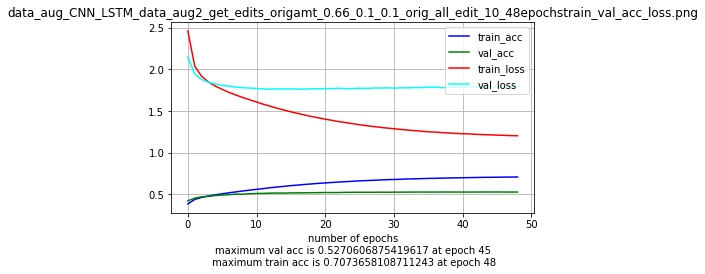

<Figure size 432x288 with 0 Axes>

In [6]:
#ques_types= ['how many', 'is this a', 'is there a', 'what color is the', 'counting']

ques_types= ['0.1_0.1']
data_splits = ['orig_10', 'orig_all', 'orig_10_edit_10','orig_all_edit_10',  'orig_all_edit_all']
data_splits = ['orig_all_edit_10']

exps = ['data_aug_CNN_LSTM_data_aug2_get_edits_origamt_0.66']


for exp in exps:    
    plots_dir = os.path.join('/BS/vedika3/nobackup/pytorch-vqa/plots', exp)
    os.makedirs(plots_dir, exist_ok=True)
    for ques_type in ques_types:

        for data_split in data_splits:
            path = '/BS/vedika3/nobackup/pytorch-vqa/models/'+ exp + '/' + ques_type + '/' + data_split + '/epoch_49.pth'
            results = torch.load(path)
            #
            # ipdb > results.keys()
            # dict_keys(['name', 'tracker', 'config', 'weights', 'eval', 'vocab'])

            train_loss = torch.FloatTensor(results['tracker']['train_loss'])   ### train_loss, train_acc, val_loss, val_acc
            train_loss = train_loss.mean(dim=1).numpy()

            val_loss = torch.FloatTensor(results['tracker']['val_loss'])   ### train_loss, train_acc, val_loss, val_acc
            val_loss = val_loss.mean(dim=1).numpy()


            train_acc = torch.FloatTensor(results['tracker']['train_acc'])   ### train_loss, train_acc, val_loss, val_acc
            train_acc = train_acc.mean(dim=1).numpy()

            val_acc = torch.FloatTensor(results['tracker']['val_acc'])   ### train_loss, train_acc, val_loss, val_acc
            val_acc = val_acc.mean(dim=1).numpy()


            str_put = 'maximum val acc is {} at epoch {}'.format(np.sort(val_acc)[-1], np.argsort(val_acc)[-1]) + \
            '\n maximum train acc is {} at epoch {}'.format(np.sort(train_acc)[-1], np.argsort(train_acc)[-1])
            if 'edit' in data_split:
                if np.argsort(val_acc)[-1] <15:
                    max_val_acc_where_more_15 = [i for i in np.argsort(val_acc)[::-1] if i>15][0]
                    max_val_acc_more_15 = val_acc[max_val_acc_where_more_15 ]
                    str_put = str_put + '\n best_val_model after 15 epochs, acc:{} at epoch{}'.format(max_val_acc_more_15,max_val_acc_where_more_15)

            plt.figure(figsize=(6.5,3.5))
            plt.plot(train_acc, color='blue', label='train_acc')
            plt.plot(val_acc, color='green', label='val_acc')
            plt.plot(train_loss, color='red', label='train_loss')
            plt.plot(val_loss, color='cyan',label='val_loss')
            plt.xlabel('number of epochs' + '\n' + str_put)
            plt.title(exp + '_' + ques_type + '_' + data_split + 'train_val_acc_loss.png')
            plt.legend()
            plt.grid(True)
            #plt.tight_layout()
            plt.show()

            plt.savefig( plots_dir + '/' +  ques_type + '_' + data_split + 'train_val_acc_loss.png')

In [3]:
len(val_acc)

38

In [22]:
plots_dir = os.path.join('/BS/vedika3/nobackup/pytorch-vqa/plots', exp)
ques_types= ['how many', 'is this a', 'is there a', 'what color is the', 'counting']
data_splits = ['orig_10', 'orig_all', 'orig_10_edit_10','orig_all_edit_10',  'orig_all_edit_all']
exp = 'finetuning_CNN_LSTM'
os.makedirs(plots_dir, exist_ok=True)
desired_dict = {}
final_max_val_acc = []
final_max_val_acc_where = []
for ques_type in ques_types:
    min_data = []
    min_data_where = []
    for data_split in data_splits:
        path = '/BS/vedika3/nobackup/pytorch-vqa/models/'+ exp + '/' + ques_type + '/' + data_split + '/epoch_49.pth'
        results = torch.load(path)
        #
        # ipdb > results.keys()
        # dict_keys(['name', 'tracker', 'config', 'weights', 'eval', 'vocab'])

        train_loss = torch.FloatTensor(results['tracker']['train_loss'])   ### train_loss, train_acc, val_loss, val_acc
        train_loss = train_loss.mean(dim=1).numpy()

        val_loss = torch.FloatTensor(results['tracker']['val_loss'])   ### train_loss, train_acc, val_loss, val_acc
        val_loss = val_loss.mean(dim=1).numpy()


        train_acc = torch.FloatTensor(results['tracker']['train_acc'])   ### train_loss, train_acc, val_loss, val_acc
        train_acc = train_acc.mean(dim=1).numpy()

        val_acc = torch.FloatTensor(results['tracker']['val_acc'])   ### train_loss, train_acc, val_loss, val_acc
        val_acc = val_acc.mean(dim=1).numpy()


#         str_put = 'maximum val acc is {} at epoch {}'.format(np.sort(val_acc)[-1], np.argsort(val_acc)[-1]) + \
#         '\n#maximum train acc is {} at epoch {}'.format(np.sort(train_acc)[-1], np.argsort(train_acc)[-1])

        #print(ques_type.replace(' ', '_') + '_' + data_split + ' = ' + str(np.argsort(val_acc)[-1]))
        max_val_acc_where=  np.argsort(val_acc)[-1]
        max_val_acc= np.argsort(val_acc)[-1]
        if 'edit' in data_split:
            if np.argsort(val_acc)[-1] <15:
                max_val_acc_where = [i for i in np.argsort(val_acc)[::-1] if i>15][0]
                max_val_acc = val_acc[max_val_acc_where_more_10]

        desired_dict[ques_type.replace(' ', '_') + '_' + data_split] =  max_val_acc_where
        #print( '#' + str_put)
        
        min_data.append(max_val_acc_where)
        min_data_where.append(max_val_acc)
    final_max_val_acc.append(min_data)
    final_max_val_acc_where.append(min_data_where)
 

In [24]:
desired_dict

{'how_many_orig_10': 46,
 'how_many_orig_all': 1,
 'how_many_orig_10_edit_10': 18,
 'how_many_orig_all_edit_10': 21,
 'how_many_orig_all_edit_all': 16,
 'is_this_a_orig_10': 14,
 'is_this_a_orig_all': 21,
 'is_this_a_orig_10_edit_10': 45,
 'is_this_a_orig_all_edit_10': 19,
 'is_this_a_orig_all_edit_all': 28,
 'is_there_a_orig_10': 22,
 'is_there_a_orig_all': 13,
 'is_there_a_orig_10_edit_10': 33,
 'is_there_a_orig_all_edit_10': 42,
 'is_there_a_orig_all_edit_all': 17,
 'what_color_is_the_orig_10': 5,
 'what_color_is_the_orig_all': 2,
 'what_color_is_the_orig_10_edit_10': 44,
 'what_color_is_the_orig_all_edit_10': 21,
 'what_color_is_the_orig_all_edit_all': 16,
 'counting_orig_10': 27,
 'counting_orig_all': 11,
 'counting_orig_10_edit_10': 20,
 'counting_orig_all_edit_10': 16,
 'counting_orig_all_edit_all': 22}

In [ ]:
import pandas as pd
pd.DataFrame(max_val_acc, columns=['orig_10', 'orig_all', 'orig_10_edit_10','orig_all_edit_10',  'orig_all_edit_all'], index=  ['how many', 'is this a', 'is there a', 'what color is the', 'counting'] )

In [ ]:
pd.DataFrame(max_val_acc_where, columns=['orig_10', 'orig_all', 'orig_10_edit_10','orig_all_edit_10',  'orig_all_edit_all'], index=  ['how many', 'is this a', 'is there a', 'what color is the', 'counting'])

In [31]:
### TESTING PHASE
model_type = 'finetuning_CNN_LSTM'
ques_types= ['how many', 'is this a', 'is there a',  'what color is the','counting']
model_training_splits = ['orig_10', 'orig_all', 'orig_10_edit_10','orig_all_edit_10',  'orig_all_edit_all']
test_data_splits = ['orig_90_10', 'edit_10', 'orig_90_all', 'edit_all']
ques_type= ques_types[4]
data = []
print(ques_type)
for model_trained_data_split in model_training_splits:
    mini_data = []
    for test_data_split in test_data_splits:   
        res_json_folder = '/BS/vedika3/nobackup/pytorch-vqa/finetuning_logs_using_epoch49/' + model_type  + '/' + ques_type  + '/' + test_data_split
        res_json = os.path.join(res_json_folder, 'results_fineuned_using_' + model_trained_data_split + '.json')
        with open(res_json, 'r') as f:
            details = json.load(f)
        mini_data.append(details['accuracy'])
    data.append(mini_data)

pd.DataFrame(data, columns=['orig_90_10', 'edit_10', 'orig_90_all', 'edit_all'] , index=['orig_10', 'orig_all', 'orig_10_edit_10','orig_all_edit_10',  'orig_all_edit_all'])


counting


,orig_90_10,edit_10,orig_90_all,edit_all
orig_10,0.436707,0.363247,0.387523,0.392600
orig_all,0.406615,0.347981,0.383181,0.390871
orig_10_edit_10,0.437453,0.384078,0.395014,0.396313
orig_all_edit_10,0.417558,0.370666,0.390350,0.394230
orig_all_edit_all,0.413952,0.354687,0.384562,0.392631


In [ ]:
orig_ids = ['1','2','3']
edit_ids = ['1_17', '1_21', '3_4']

In [ ]:
from collections import defaultdict
orig_edit_id = defaultdict(list)
for orig_id in orig_ids:
    for edit_id in edit_ids:
        if edit_id[0]==orig_id:
            orig_edit_id[orig_id].append(edit_id)

In [ ]:
orig_edit_id 